In [1]:
import pandas, numpy

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20})

# 0. user-defined variables

In [2]:
data_file ='/home/adrian/projects/HUVECs/data/csv/HUVEC_AllMeasurements_Summary_21.12.2020.15NROSA.csv'

# 1. read data

In [3]:
df = pandas.read_csv(data_file)
df.astype('float', errors='ignore')
df.head()

,Sample ID(MS),Sample ID Rosa,Experiment,13label,Treatment,Timepoint (h),Cell numbers,Aspartate,Glutamate,Glutamine,GSH,UDP-nAcGln
0,142,"0h, egm",1,label,0.0,0,830000,0.0000,0.0,0.0,0.0,0.0
1,143,"0h, egm",1,"1uM, label",0.5,0,830000,0.0000,0.0,0.0,0.0,0.0
2,144,"0h, egm",1,"10uM, label",5.0,0,830000,0.0921,0.0,0.0,0.0,0.0
3,145,"4h, egm",1,egm,0.0,4,1500000,0.0000,0.0,0.0,0.0,0.0
4,146,"4h, egm",1,egm,0.0,4,1500000,0.0074,0.0,0.0,0.0,0.0


# 2. format data

## 2.1. select appropriate rows

In [4]:
# removing egm of T4 and T24 because they are very close to zero
df = df[~((df['13label'] == 'egm') & (df['Timepoint (h)'] == 4))] 
df = df[~((df['13label'] == 'egm') & (df['Timepoint (h)'] == 24))] 

In [5]:
pandas.set_option("display.max_rows", 200, "display.max_columns", 20)
print(df)

    Sample ID(MS) Sample ID Rosa  Experiment      13label  Treatment  \
0             142        0h, egm           1        label        0.0   
1             143        0h, egm           1   1uM, label        0.5   
2             144        0h, egm           1  10uM, label        5.0   
6             148    15N-4h, 0µM           1     15N, 0µM        0.0   
7             149    15N-4h, 0µM           1     15N, 0µM        0.0   
8             150    15N-4h, 0µM           1     15N, 0µM        0.0   
9             151    15N-4h, 1µM           1     15N, 1µM        0.5   
10            152    15N-4h, 1µM           1     15N, 1µM        0.5   
11            153    15N-4h, 1µM           1     15N, 1µM        0.5   
12            154   15N-4h, 10µM           1    15N, 10µM        5.0   
13            155   15N-4h, 10µM           1    15N, 10µM        5.0   
14            156   15N-4h, 10µM           1    15N, 10µM        5.0   
18            160   15N-24h, 0µM           1     15N, 0µM       

# 3. plot

Aspartate
0.09521513191276199
0.3312602917700287
0.5
0.04042779918502612
6 significant 0.2796666666666667 0.20123333333333335 0.04042779918502612


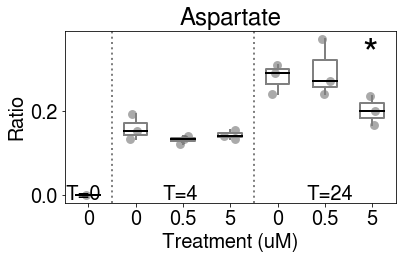

Glutamate
0.04042779918502612
2 significant 0.1429 0.12940000000000002 0.04042779918502612
0.04042779918502612
3 significant 0.1429 0.11306666666666666 0.04042779918502612
0.5
0.09521513191276199


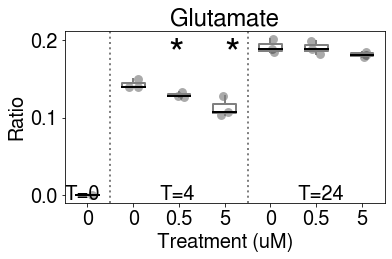

Glutamine
0.3312602917700287
0.04042779918502612
3 significant 0.5281333333333333 0.49243333333333333 0.04042779918502612
0.5
0.04042779918502612
6 significant 0.5267333333333334 0.4970666666666667 0.04042779918502612


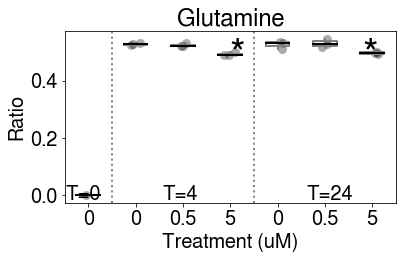

GSH
0.3312602917700287
0.5
0.19136654444261297
0.09521513191276199


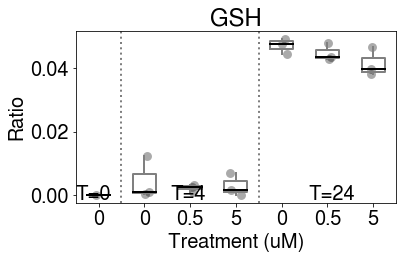

UDP-nAcGln
0.5
0.3312602917700287
0.04042779918502612
5 significant 0.2721333333333333 0.27973333333333333 0.04042779918502612
0.3312602917700287


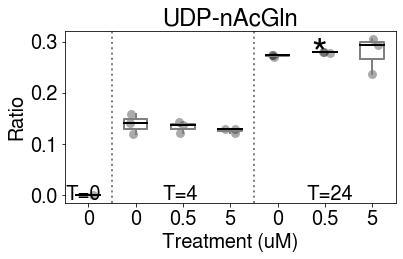

In [6]:
for metab in df.columns[7:]:
    
    print(metab)
    
    loc_zero_zero = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 0)][metab].values
    
    loc_four_zero = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 4)][metab].values
    loc_four_half = df[(df['Treatment'] == 0.5) & (df['Timepoint (h)'] == 4)][metab].values
    loc_four_five = df[(df['Treatment'] == 5) & (df['Timepoint (h)'] == 4)][metab].values

    loc_twentyfour_zero = df[(df['Treatment'] == 0) & (df['Timepoint (h)'] == 24)][metab].values
    loc_twentyfour_half = df[(df['Treatment'] == 0.5) & (df['Timepoint (h)'] == 24)][metab].values
    loc_twentyfour_five = df[(df['Treatment'] == 5) & (df['Timepoint (h)'] == 24)][metab].values
    
    quant = [loc_zero_zero, loc_four_zero, loc_four_half, loc_four_five, loc_twentyfour_zero, loc_twentyfour_half, loc_twentyfour_five]
        
    ###
    ### boxplots
    ###
    
    f = matplotlib.pyplot.figure()
    ax = f.add_subplot(111)
    
    filtered = [element[~numpy.isnan(element)] for element in quant]
        
    matplotlib.pyplot.boxplot(filtered, showcaps=False, medianprops=dict(linewidth=2, color='black'), boxprops=dict(linewidth=2, color='gray'), whiskerprops=dict(linewidth=2, color='gray'))
    
    ###
    ### scatter plots
    ###
    
    x=[]; y=[]
    for i in range(len(quant)):
        for j in range(len(quant[i])):
            
            shift = 0.25
            r=-shift/2 + shift*numpy.random.random()
            x.append(i+1+r)
            
            y.append(quant[i][j])
            
    matplotlib.pyplot.scatter(x, y, s=80, c='black', alpha=1/3, linewidths=0)
    
    ###
    ### statistics
    ###
    
    for pos in [2, 3]:
        stat, pvalue = scipy.stats.mannwhitneyu(filtered[1], filtered[pos])
        #print(pvalue)
        if 0.01 < pvalue < 0.05:
            print(pos, 'significant', numpy.mean(filtered[1]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/5.75, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
        if pvalue < 0.01:
            print(pos, 'very significant', numpy.mean(filtered[1]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/5.5, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
            
    for pos in [5, 6]:
        stat, pvalue = scipy.stats.mannwhitneyu(filtered[4], filtered[pos])
        #print(pvalue)
        if 0.01 < pvalue < 0.05:
            print(pos, 'significant', numpy.mean(filtered[4]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/6.5, 0.85, '*', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
        if pvalue < 0.01:
            print(pos, 'very significant', numpy.mean(filtered[5]), numpy.mean(filtered[pos]), pvalue)
            matplotlib.pyplot.text(pos/6, 0.85, '**', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center', fontsize=40)
            
    ###
    ### close figure
    ###
    
    matplotlib.pyplot.axvline(1.5, alpha=0.5, lw=2, color='black', ls=':')
    matplotlib.pyplot.axvline(4.5, alpha=0.5, lw=2, color='black', ls=':')
    
    matplotlib.pyplot.text(0.055, 0.05, 'T=0', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.35, 0.05, 'T=4', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    matplotlib.pyplot.text(0.8, 0.05, 'T=24', transform=ax.transAxes, horizontalalignment='center', verticalalignment='center')
    
    matplotlib.pyplot.xlabel('Treatment (uM)')
    matplotlib.pyplot.ylabel('Ratio')
    matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7], ['0', '0', '0.5', '5', '0', '0.5', '5'])
    matplotlib.pyplot.title(metab)
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()